# Data Exploration and DIscovery

## Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [2]:
# loading data 
df = pd.read_csv('data.csv')
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [3]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

# Checking Missing value 

In [4]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
# checking of missing value 
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [6]:
# checking for unqiue value 
df['Transmission Type'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [7]:
unique_vals = {col:df[col].unique() for col in df}
unique_vals

{'Make': array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
        'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
        'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
        'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
        'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
        'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
        'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
        'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
        'Bugatti'], dtype=object),
 'Model': array(['1 Series M', '1 Series', '100', '124 Spider', '190-Class',
        '2 Series', '200', '200SX', '240SX', '240', '2',
        '3 Series Gran Turismo', '3 Series', '300-Class', '3000GT', '300',
        '300M', '300ZX', '323', '350-Class', '350Z', '360', '370Z', '3',
        '4 Series Gran Coupe', '4 Series', '400-Class', '420-Class',
        '456M', '458 Italia', '4C'

In [8]:
df.replace('UNKNOWN',np.nan,inplace=True)
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type      19
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [9]:
df.drop(['Market Category'],axis=1,inplace=True)
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

  Vehicle Size Vehicle Style  highway MPG  city mpg  Popularity   MSRP  
0      Compact         Coupe           26        19        3916  46135  
1      Compact   Convertible           28        19        3916  40650  
2      Compact         Coupe           28        20        3916  36350  
3      Compact         Coupe           28        18        3916  29450  
4      Compact   Convertible           28        18        3916  34500

# Numerical Features

## Imputing numerical Features

In [10]:
from sklearn.impute import SimpleImputer
numerical=df.select_dtypes(include=['float64', 'int64'])
ImputeN=SimpleImputer(strategy='mean')
numericaldf=ImputeN.fit_transform(numerical)
numericaldf=pd.DataFrame(data=numericaldf,columns=numerical.columns)
numericaldf.isnull().sum()

Year                0
Engine HP           0
Engine Cylinders    0
Number of Doors     0
highway MPG         0
city mpg            0
Popularity          0
MSRP                0
dtype: int64

# Catgorical Features

## Imputing for Catgorical Features

In [11]:
categorical = df.select_dtypes(include='object')

In [12]:
from sklearn.impute import SimpleImputer
ImputeC=SimpleImputer(strategy='most_frequent')
cdata=ImputeC.fit_transform(categorical)
catdf=pd.DataFrame(data=cdata,columns=categorical.columns)
catdf.isna().sum()

Make                 0
Model                0
Engine Fuel Type     0
Transmission Type    0
Driven_Wheels        0
Vehicle Size         0
Vehicle Style        0
dtype: int64

# Visualization 

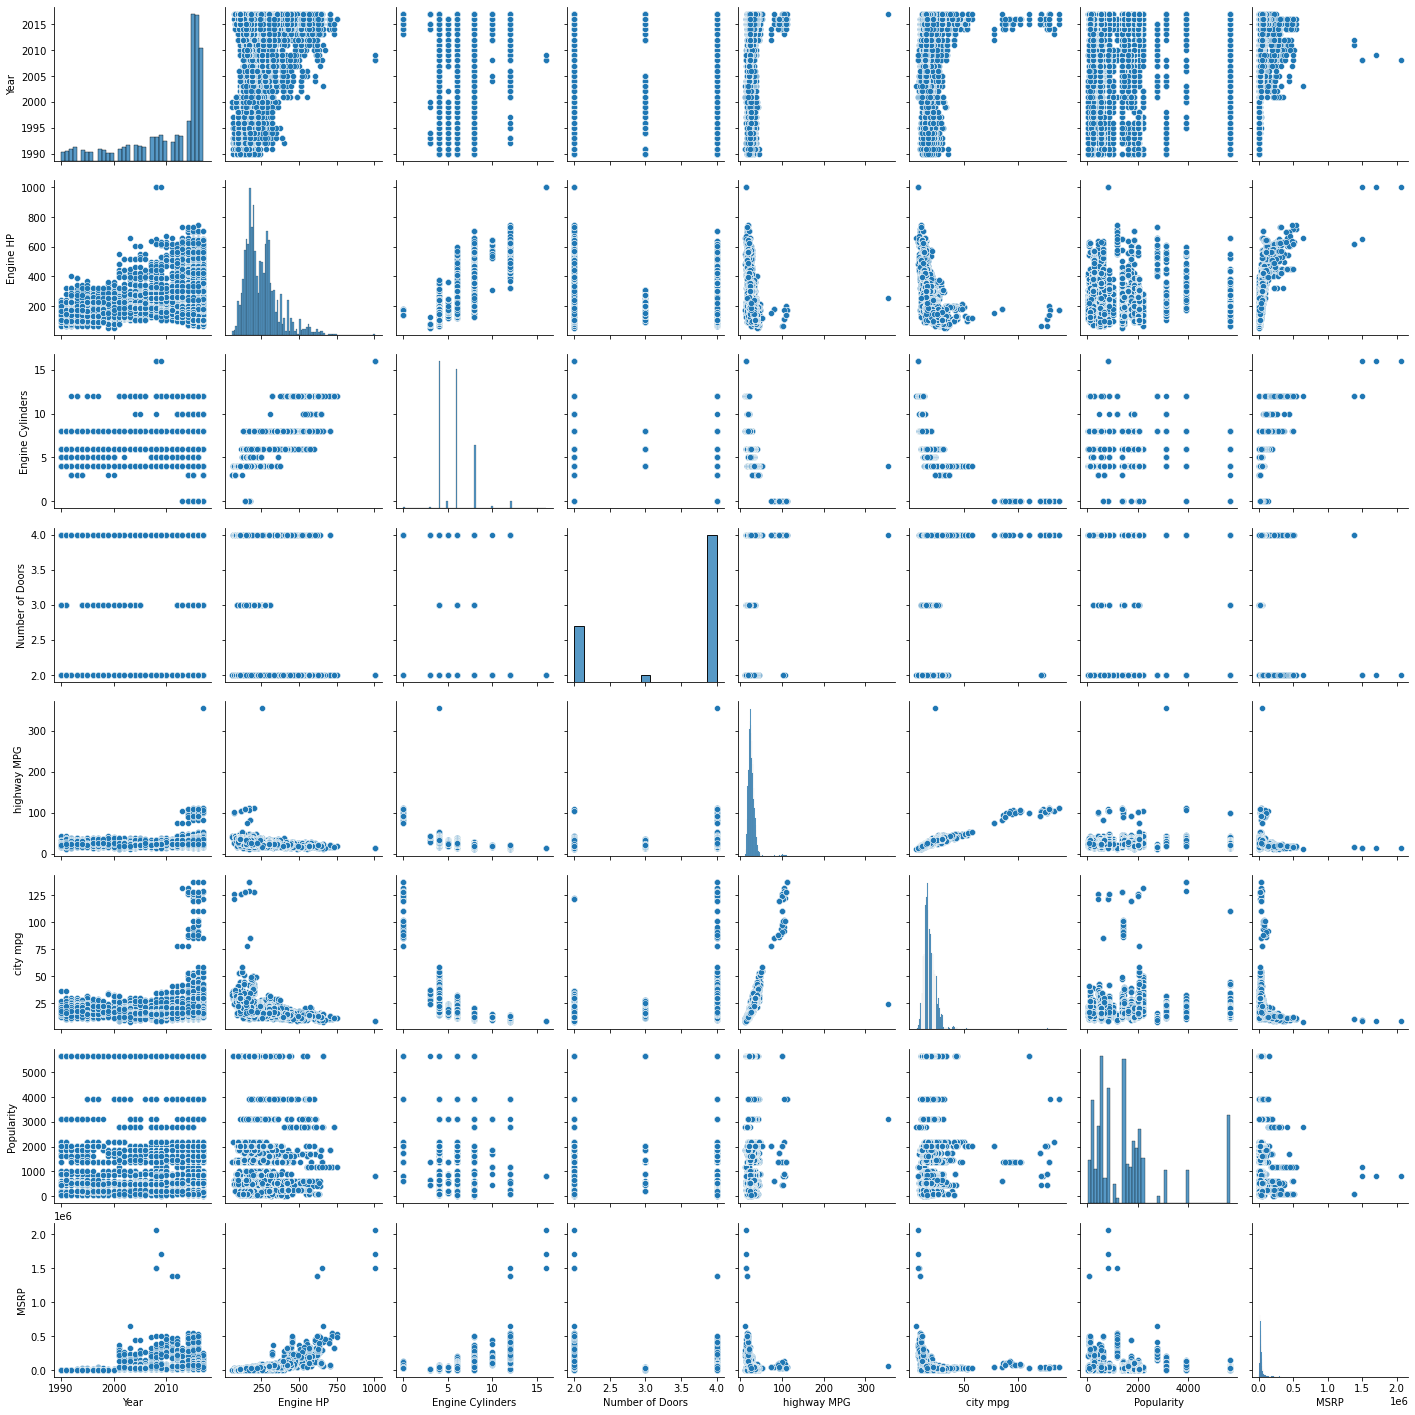

In [13]:
sns.pairplot(df)
plt.show()

# Feature engineering for Numerical features

## Outlier Detection 

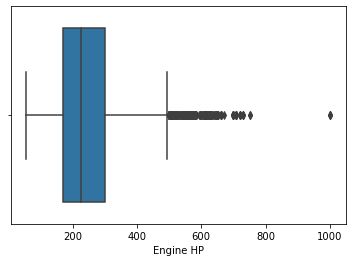

Before removing the outlier:  (11914, 8)


In [14]:
#finding outlier 
sns.boxplot(x=numericaldf['Engine HP'])
plt.show()
print("Before removing the outlier: ",numericaldf.shape)


In [15]:
#removing of outlier in Engine HP
Q1 = numericaldf['Engine HP'].quantile(0.25)
Q3 = numericaldf['Engine HP'].quantile(0.75)

IQR = Q3 - Q1

upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

df2=numericaldf[(numericaldf['Engine HP']> lowerlimit)  & (numericaldf['Engine HP']< upperlimit)]
print("Aftering removing the outiler",df2.shape)

Aftering removing the outiler (11405, 8)


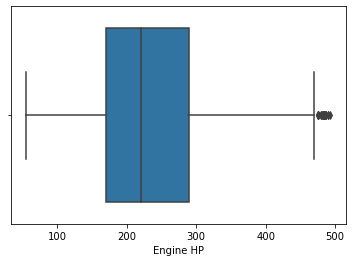

In [16]:
#after removing outliers
sns.boxplot(x=df2['Engine HP'])
plt.show()

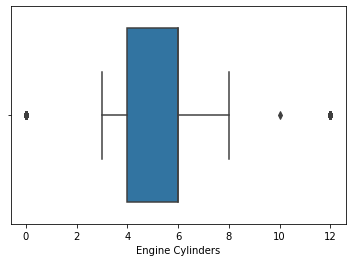

before removing the outiler (11405, 8)


In [17]:
#finding outlier
sns.boxplot(x=df2['Engine Cylinders'])
plt.show()
print("before removing the outiler",df2.shape)

In [18]:
#removing of outlier in Engine Cylinders
Q1 = df2['Engine Cylinders'].quantile(0.25)
Q3 = df2['Engine Cylinders'].quantile(0.75)

IQR = Q3 - Q1

upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

df3=df2[(df2['Engine Cylinders']> lowerlimit)  & (df2['Engine Cylinders']< upperlimit)]
print("Aftering removing the outiler",df3.shape)

Aftering removing the outiler (11298, 8)


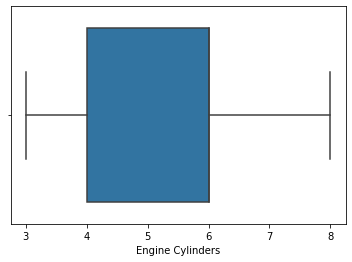

In [19]:
#after removing outlier
sns.boxplot(x=df3['Engine Cylinders'])
plt.show()

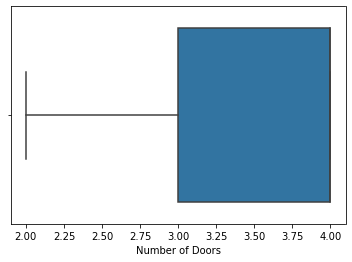

In [20]:
#finding the outliers
sns.boxplot(x=df3['Number of Doors'])
plt.show()

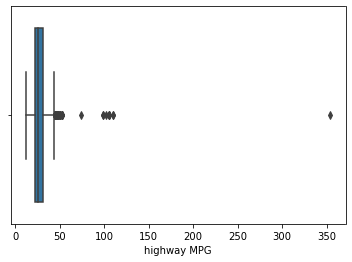

Before removing the outiler (11298, 8)


In [21]:
#finding outlier
sns.boxplot(x=df3['highway MPG'])
plt.show()
print("Before removing the outiler",df3.shape)

In [22]:
#removing of outlier in highway MPG
Q1 = df3['highway MPG'].quantile(0.25)
Q3 = df3['highway MPG'].quantile(0.75)

IQR = Q3 - Q1

upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

df4=df3[(df3['highway MPG']> lowerlimit)  & (df3['highway MPG']< upperlimit)]
print("Aftering removing the outiler",df4.shape)

Aftering removing the outiler (11214, 8)


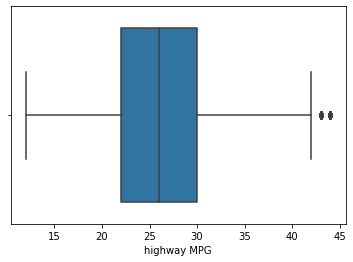

In [23]:
#after removing the outliers
sns.boxplot(x=df4['highway MPG'])
plt.show()

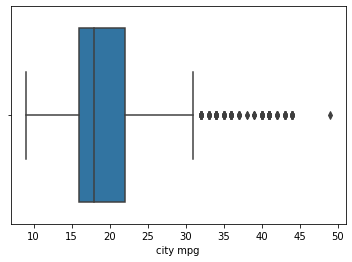

before removing the outiler (11214, 8)


In [24]:
#finding outliers
sns.boxplot(x=df4['city mpg'])
plt.show()
print("before removing the outiler",df4.shape)

In [25]:
# Removing of Outlier 
Q1 = df4['city mpg'].quantile(0.25)
Q3 = df4['city mpg'].quantile(0.75)

IQR = Q3 - Q1

upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

df5=df4[(df4['city mpg']> lowerlimit)  & (df4['city mpg']< upperlimit)]
print("Aftering removing the outiler",df5.shape)

Aftering removing the outiler (10911, 8)


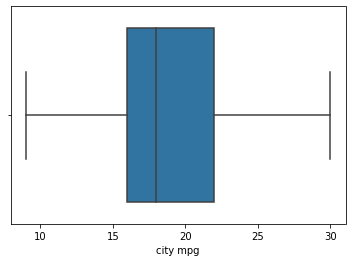

In [26]:
#After removing outliers
sns.boxplot(x=df5['city mpg'])
plt.show()

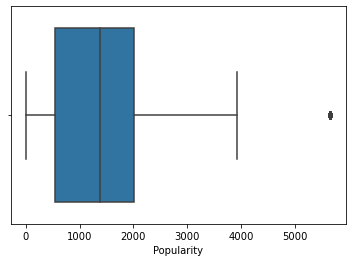

before removing the outiler (10911, 8)


In [27]:
#finding outliers
sns.boxplot(x=df5['Popularity'])
plt.show()
print("before removing the outiler",df5.shape)

In [28]:
#removing outliers
Q1 = df5['Popularity'].quantile(0.25)
Q3 = df5['Popularity'].quantile(0.75)

IQR = Q3 - Q1

upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)

df6=df5[(df5['Popularity']> lowerlimit)  & (df5['Popularity']< upperlimit)]
print("Aftering removing the outiler",df6.shape)

Aftering removing the outiler (10071, 8)


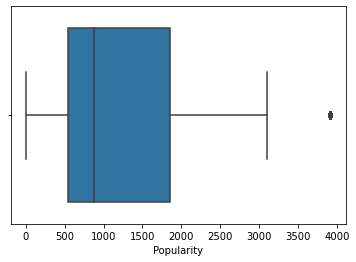

In [29]:
#after removing outlier 
sns.boxplot(x=df6['Popularity'])
plt.show()

## Feature Scaling 

In [30]:
#feature scaling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_data = sc.fit_transform(df6)
df7 = pd.DataFrame(data=scaled_data,columns=df6.columns)
df7.head()

Year  Engine HP  Engine Cylinders  Number of Doors  highway MPG  \
0  0.777778   0.629977               0.6              0.0       0.4375   
1  0.777778   0.548009               0.6              0.0       0.5000   
2  0.777778   0.548009               0.6              0.0       0.5000   
3  0.777778   0.384075               0.6              0.0       0.5000   
4  0.777778   0.384075               0.6              0.0       0.5000   

   city mpg  Popularity      MSRP  
0  0.476190         1.0  0.123286  
1  0.476190         1.0  0.107964  
2  0.523810         1.0  0.095952  
3  0.428571         1.0  0.076678  
4  0.428571         1.0  0.090785

# Heatmap

In [31]:
df7.corr()

Year  Engine HP  Engine Cylinders  Number of Doors  \
Year              1.000000   0.414177         -0.044820         0.278494   
Engine HP         0.414177   1.000000          0.731991         0.023371   
Engine Cylinders -0.044820   0.731991          1.000000        -0.019707   
Number of Doors   0.278494   0.023371         -0.019707         1.000000   
highway MPG       0.346773  -0.420386         -0.701408         0.067947   
city mpg          0.302052  -0.525670         -0.763508         0.082568   
Popularity        0.164583   0.141051          0.063858        -0.070270   
MSRP              0.474575   0.722634          0.401562        -0.005245   

                  highway MPG  city mpg  Popularity      MSRP  
Year                 0.346773  0.302052    0.164583  0.474575  
Engine HP           -0.420386 -0.525670    0.141051  0.722634  
Engine Cylinders    -0.701408 -0.763508    0.063858  0.401562  
Number of Doors      0.067947  0.082568   -0.070270 -0.005245  
highway MPG          1.000000  0.937478    0.041736 -0.150926  
city mpg             0.937478  1.000000    0.028691 -0.224375  
Popularity           0.041736  0.028691    1.000000  0.115160  
MSRP                -0.150926 -0.224375    0.115160  1.000000

<AxesSubplot:>

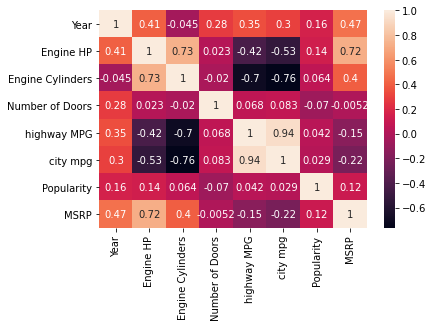

In [32]:
sns.heatmap(df7.corr(), annot=True)

# Feature engineering  for catgorical Features

## Removed records from categorical features

In [33]:
rows=len(catdf)
for i in range(rows):
    if i not in df7.index:
        catdf=catdf.drop(i)

In [34]:
catdf.shape

(10071, 7)

In [35]:
df7.shape

(10071, 8)

In [36]:
df6.isnull().sum()

Year                0
Engine HP           0
Engine Cylinders    0
Number of Doors     0
highway MPG         0
city mpg            0
Popularity          0
MSRP                0
dtype: int64

## Encoding For categorical Features

In [37]:
ordinaldata=catdf[['Vehicle Size','Transmission Type']]
normianaldata=catdf.drop(['Vehicle Size','Transmission Type'], axis=1)


In [38]:
#for ordinal Data
from sklearn.preprocessing import OrdinalEncoder
Od=OrdinalEncoder()
oddata=Od.fit_transform(ordinaldata)
ordinaldf=pd.DataFrame(data=oddata,columns=ordinaldata.columns)
ordinaldf

Vehicle Size  Transmission Type
0               0.0                3.0
1               0.0                3.0
2               0.0                3.0
3               0.0                3.0
4               0.0                3.0
...             ...                ...
10066           0.0                3.0
10067           0.0                3.0
10068           0.0                3.0
10069           0.0                3.0
10070           0.0                3.0

[10071 rows x 2 columns]

In [39]:
#for norminal data
from sklearn.preprocessing import OneHotEncoder
Ohe=OneHotEncoder()
ohedata=Ohe.fit_transform(normianaldata).toarray()
ohedata
norimaldf=pd.DataFrame(data=ohedata,columns=Ohe.get_feature_names())
norimaldf

/Users/namgyalwangchuk/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


x0_Acura  x0_Alfa Romeo  x0_Aston Martin  x0_Audi  x0_BMW  x0_Bentley  \
0           0.0            0.0              0.0      0.0     1.0         0.0   
1           0.0            0.0              0.0      0.0     1.0         0.0   
2           0.0            0.0              0.0      0.0     1.0         0.0   
3           0.0            0.0              0.0      0.0     1.0         0.0   
4           0.0            0.0              0.0      0.0     1.0         0.0   
...         ...            ...              ...      ...     ...         ...   
10066       0.0            0.0              0.0      0.0     0.0         0.0   
10067       0.0            0.0              0.0      0.0     0.0         0.0   
10068       0.0            0.0              0.0      0.0     0.0         0.0   
10069       0.0            0.0              0.0      0.0     0.0         0.0   
10070       0.0            0.0              0.0      0.0     0.0         0.0   

       x0_Buick  x0_Cadillac  x0_Chevrolet  x0_Chrysler  ...  x4_Convertible  \
0           0.0          0.0           0.0          0.0  ...             0.0   
1           0.0          0.0           0.0          0.0  ...             1.0   
2           0.0          0.0           0.0          0.0  ...             0.0   
3           0.0          0.0           0.0          0.0  ...             0.0   
4           0.0          0.0           0.0          0.0  ...             1.0   
...         ...          ...           ...          ...  ...             ...   
10066       0.0          0.0           0.0          0.0  ...             0.0   
10067       0.0          0.0           0.0          0.0  ...             0.0   
10068       0.0          0.0           0.0          0.0  ...             1.0   
10069       0.0          0.0           0.0          0.0  ...             0.0   
10070       0.0          0.0           0.0          0.0  ...             0.0   

       x4_Convertible SUV  x4_Coupe  x4_Crew Cab Pickup  \
0                     0.0       1.0                 0.0   
1                     0.0       0.0                 0.0   
2                     0.0       1.0                 0.0   
3                     0.0       1.0                 0.0   
4                     0.0       0.0                 0.0   
...                   ...       ...                 ...   
10066                 0.0       0.0                 0.0   
10067                 0.0       0.0                 0.0   
10068                 0.0       0.0                 0.0   
10069                 0.0       1.0                 0.0   
10070                 0.0       0.0                 0.0   

       x4_Extended Cab Pickup  x4_Passenger Minivan  x4_Passenger Van  \
0                         0.0                   0.0               0.0   
1                         0.0                   0.0               0.0   
2                         0.0                   0.0               0.0   
3                         0.0                   0.0               0.0   
4                         0.0                   0.0               0.0   
...                       ...                   ...               ...   
10066                     0.0                   0.0               0.0   
10067                     0.0                   0.0               0.0   
10068                     0.0                   0.0               0.0   
10069                     0.0                   0.0               0.0   
10070                     0.0                   0.0               0.0   

       x4_Regular Cab Pickup  x4_Sedan  x4_Wagon  
0                        0.0       0.0       0.0  
1                        0.0       0.0       0.0  
2                        0.0       0.0       0.0  
3                        0.0       0.0       0.0  
4                        0.0       0.0       0.0  
...                      ...       ...       ...  
10066                    0.0       1.0       0.0  
10067                    0.0       1.0       0.0  
10068                    0.0       0.0  

# Combine Features

## Combine norimal and ordinaldf 

In [40]:
cdf = pd.concat([norimaldf,ordinaldf], axis = 1)
cdf

x0_Acura  x0_Alfa Romeo  x0_Aston Martin  x0_Audi  x0_BMW  x0_Bentley  \
0           0.0            0.0              0.0      0.0     1.0         0.0   
1           0.0            0.0              0.0      0.0     1.0         0.0   
2           0.0            0.0              0.0      0.0     1.0         0.0   
3           0.0            0.0              0.0      0.0     1.0         0.0   
4           0.0            0.0              0.0      0.0     1.0         0.0   
...         ...            ...              ...      ...     ...         ...   
10066       0.0            0.0              0.0      0.0     0.0         0.0   
10067       0.0            0.0              0.0      0.0     0.0         0.0   
10068       0.0            0.0              0.0      0.0     0.0         0.0   
10069       0.0            0.0              0.0      0.0     0.0         0.0   
10070       0.0            0.0              0.0      0.0     0.0         0.0   

       x0_Buick  x0_Cadillac  x0_Chevrolet  x0_Chrysler  ...  x4_Coupe  \
0           0.0          0.0           0.0          0.0  ...       1.0   
1           0.0          0.0           0.0          0.0  ...       0.0   
2           0.0          0.0           0.0          0.0  ...       1.0   
3           0.0          0.0           0.0          0.0  ...       1.0   
4           0.0          0.0           0.0          0.0  ...       0.0   
...         ...          ...           ...          ...  ...       ...   
10066       0.0          0.0           0.0          0.0  ...       0.0   
10067       0.0          0.0           0.0          0.0  ...       0.0   
10068       0.0          0.0           0.0          0.0  ...       0.0   
10069       0.0          0.0           0.0          0.0  ...       1.0   
10070       0.0          0.0           0.0          0.0  ...       0.0   

       x4_Crew Cab Pickup  x4_Extended Cab Pickup  x4_Passenger Minivan  \
0                     0.0                     0.0                   0.0   
1                     0.0                     0.0                   0.0   
2                     0.0                     0.0                   0.0   
3                     0.0                     0.0                   0.0   
4                     0.0                     0.0                   0.0   
...                   ...                     ...                   ...   
10066                 0.0                     0.0                   0.0   
10067                 0.0                     0.0                   0.0   
10068                 0.0                     0.0                   0.0   
10069                 0.0                     0.0                   0.0   
10070                 0.0                     0.0                   0.0   

       x4_Passenger Van  x4_Regular Cab Pickup  x4_Sedan  x4_Wagon  \
0                   0.0                    0.0       0.0       0.0   
1                   0.0                    0.0       0.0       0.0   
2                   0.0                    0.0       0.0       0.0   
3                   0.0                    0.0       0.0       0.0   
4                   0.0                    0.0       0.0       0.0   
...                 ...                    ...       ...       ...   
10066               0.0                    0.0       1.0       0.0   
10067               0.0                    0.0       1.0       0.0   
10068               0.0                    0.0       0.0       0.0   
10069               0.0                    0.0       0.0       0.0   
10070               0.0                    0.0       1.0       0.0   

       Vehicle Size  Transmission Type  
0               0.0                3.0  
1               0.0                3.0  
2               0.0                3.0  
3               0.0                3.0  
4               0.0                3.0  
...             ...                ...  
10066           0.0                3.0  
10067           0.0                3.0  
10068           0.0                3.0  
10069

# Combine numerical and categroical Features

In [41]:
alldf=pd.concat([cdf,df7
                ],axis=1)
alldf.head()

x0_Acura  x0_Alfa Romeo  x0_Aston Martin  x0_Audi  x0_BMW  x0_Bentley  \
0       0.0            0.0              0.0      0.0     1.0         0.0   
1       0.0            0.0              0.0      0.0     1.0         0.0   
2       0.0            0.0              0.0      0.0     1.0         0.0   
3       0.0            0.0              0.0      0.0     1.0         0.0   
4       0.0            0.0              0.0      0.0     1.0         0.0   

   x0_Buick  x0_Cadillac  x0_Chevrolet  x0_Chrysler  ...  Vehicle Size  \
0       0.0          0.0           0.0          0.0  ...           0.0   
1       0.0          0.0           0.0          0.0  ...           0.0   
2       0.0          0.0           0.0          0.0  ...           0.0   
3       0.0          0.0           0.0          0.0  ...           0.0   
4       0.0          0.0           0.0          0.0  ...           0.0   

   Transmission Type      Year  Engine HP  Engine Cylinders  Number of Doors  \
0                3.0  0.777778   0.629977               0.6              0.0   
1                3.0  0.777778   0.548009               0.6              0.0   
2                3.0  0.777778   0.548009               0.6              0.0   
3                3.0  0.777778   0.384075               0.6              0.0   
4                3.0  0.777778   0.384075               0.6              0.0   

   highway MPG  city mpg  Popularity      MSRP  
0       0.4375  0.476190         1.0  0.123286  
1       0.5000  0.476190         1.0  0.107964  
2       0.5000  0.523810         1.0  0.095952  
3       0.5000  0.428571         1.0  0.076678  
4       0.5000  0.428571         1.0  0.090785  

[5 rows x 874 columns]

In [42]:
alldf.isnull().sum()

x0_Acura           0
x0_Alfa Romeo      0
x0_Aston Martin    0
x0_Audi            0
x0_BMW             0
                  ..
Number of Doors    0
highway MPG        0
city mpg           0
Popularity         0
MSRP               0
Length: 874, dtype: int64

# Training model and testing model

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = alldf.drop(['MSRP','Number of Doors','Popularity'],axis=1)
Y = alldf['MSRP']

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2 ,random_state=5)

## Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred_train = model.predict(X_train)
print("Y_Pred_train",y_pred_train)
y_pred_test =model.predict(X_test)
print("Y_Pred_test",y_pred_test)

Y_Pred_train [0.07746506 0.0807972  0.13680458 ... 0.11689758 0.06103897 0.03004074]
Y_Pred_test [ 0.32805443  0.03698921 -0.02119637 ...  0.00673103  0.0910759
  0.1300354 ]


## Evalution Linear Regression

In [48]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

In [49]:
linear_model_r2_score_train=r2_score(y_train,y_pred_train)
print("Train set accuracy: ",linear_model_r2_score_train)

linear_model_r2_score_test=r2_score(y_test,y_pred_test)
print("Test set accuracy : ",linear_model_r2_score_test)
# r2_score(X_test)

linear_model_mse = mean_squared_error(y_test,y_pred_test)
print("MSE:",linear_model_mse)

linear_model_mae = mean_absolute_error(y_test,y_pred_test)
print('mean_absolute_error: ',linear_model_mae)



Train set accuracy:  0.722628401157628
Test set accuracy :  -6.04940535129525e+17
MSE: 3179224444575372.5
mean_absolute_error:  2453034.6017021425


# KNN 

In [50]:
from sklearn.neighbors import KNeighborsRegressor
kmodel = KNeighborsRegressor(n_neighbors = 2)
kmodel.fit(X_train, y_train)
y_predict_Kntest = kmodel.predict(X_test)
y_pred_Kntrain = model.predict(X_train)

In [51]:
knn_model_mse=mean_squared_error(y_predict_Kntest, y_test)
print("MSE:",knn_model_mse)
# mean_absolute_error(y_predict, y_test)

MSE: 0.0019281064785166104


In [52]:
knn_model_mae=mean_absolute_error(y_predict_Kntest, y_test)
print("MAE:",knn_model_mae)

MAE: 0.019493739410911363


In [53]:
knn_r2_score_test = r2_score(y_test,y_predict_Kntest)
print("Test set accuracy : ",knn_r2_score_test)


Test set accuracy :  0.6331212894104653


# Descision Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor
dtmodel=DecisionTreeRegressor(criterion="friedman_mse",max_depth=5)

dtmodel.fit(X_train,y_train) 

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)

In [55]:
DT_y_predict=dtmodel.predict(X_test)

## Evalution of Decision Tree

In [56]:
DT_r2_score_test = r2_score(y_test,DT_y_predict)
print("Test set accuracy : ",DT_r2_score_test)

Test set accuracy :  0.8366557713458668


In [57]:
DT_model_mse = mean_squared_error(DT_y_predict,y_test)
print("MSE:",DT_model_mse)

MSE: 0.0008584446477972243


In [58]:
DT_model_mae=mean_absolute_error(DT_y_predict,y_test)
print("MAE:",DT_model_mae)

MAE: 0.0170577631059398


In [59]:
Data = {"model":['Linear Regression','KNN','Descision Tree'],
        "R2":[linear_model_r2_score_test,knn_r2_score_test,DT_r2_score_test],
       "MSE":[linear_model_mse,knn_model_mse,DT_model_mse],
        "MAE":[linear_model_mae,knn_model_mae,DT_model_mae]
       }

In [60]:
Modelscore = pd.DataFrame(Data)
pd.options.display.float_format = '{:16f}'.format
Modelscore

model                         R2                     MSE  \
0  Linear Regression -604940535129524992.000000 3179224444575372.500000   
1                KNN                   0.633121                0.001928   
2     Descision Tree                   0.836656                0.000858   

               MAE  
0   2453034.601702  
1         0.019494  
2         0.017058

# Creating model using Pipeline

In [61]:
df.head()

Make       Model  Year             Engine Fuel Type        Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)       335.000000   
1  BMW    1 Series  2011  premium unleaded (required)       300.000000   
2  BMW    1 Series  2011  premium unleaded (required)       300.000000   
3  BMW    1 Series  2011  premium unleaded (required)       230.000000   
4  BMW    1 Series  2011  premium unleaded (required)       230.000000   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0          6.000000            MANUAL  rear wheel drive         2.000000   
1          6.000000            MANUAL  rear wheel drive         2.000000   
2          6.000000            MANUAL  rear wheel drive         2.000000   
3          6.000000            MANUAL  rear wheel drive         2.000000   
4          6.000000            MANUAL  rear wheel drive         2.000000   

  Vehicle Size Vehicle Style  highway MPG  city mpg  Popularity   MSRP  
0      Compact         Coupe           26        19        3916  46135  
1      Compact   Convertible           28        19        3916  40650  
2      Compact         Coupe           28        20        3916  36350  
3      Compact         Coupe           28        18        3916  29450  
4      Compact   Convertible           28        18        3916  34500

In [62]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type    19
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
x= df.drop(['MSRP','Number of Doors','Popularity'],axis=1)
y = df['MSRP']
x_train,x_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2 ,random_state=5)
x_train.head()

Make               Model  Year             Engine Fuel Type  \
9946     Maserati              Spyder  2004  premium unleaded (required)   
4139     Cadillac     Escalade Hybrid  2011             regular unleaded   
1266        Honda              Accord  2017             regular unleaded   
10276        Ford            Taurus X  2008             regular unleaded   
1844   Volkswagen  Beetle Convertible  2015             regular unleaded   

             Engine HP  Engine Cylinders Transmission Type      Driven_Wheels  \
9946        390.000000          8.000000  AUTOMATED_MANUAL   rear wheel drive   
4139        332.000000          8.000000         AUTOMATIC   four wheel drive   
1266        189.000000          4.000000         AUTOMATIC  front wheel drive   
10276       260.000000          6.000000         AUTOMATIC    all wheel drive   
1844        170.000000          4.000000         AUTOMATIC  front wheel drive   

      Vehicle Size Vehicle Style  highway MPG  city mpg  
9946       Compact   Convertible           16        10  
4139         Large       4dr SUV           23        20  
1266       Midsize         Sedan           34        26  
10276        Large         Wagon           22        15  
1844       Compact   Convertible           32        24

# Feature engineering with pipeline

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder ,OrdinalEncoder

In [65]:
x_train.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
dtype: object

In [66]:
#selecting numerical columns
numeric_cols =x.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

Index(['Year', 'Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg'], dtype='object')


In [67]:
#selecting  categorical columns 
#ordinal
ordinal_cols = x[['Vehicle Size','Transmission Type']].columns
print(ordinal_cols)

Index(['Vehicle Size', 'Transmission Type'], dtype='object')


In [68]:
nominal_cols = x[['Make' ,'Model','Engine Fuel Type','Driven_Wheels']].columns
print(nominal_cols)

Index(['Make', 'Model', 'Engine Fuel Type', 'Driven_Wheels'], dtype='object')


In [69]:
#Building the Numeric Transformation Pipeline
n_transformer = Pipeline(steps=
                       [
                           ('imputeN',SimpleImputer(strategy='mean')),
                           ('scale',MinMaxScaler())
                       ])

In [70]:
 #Building the nominalTransformation Pipeline
nominal_transformer = Pipeline(steps=
                       [
                           ('imputeC',SimpleImputer(strategy='constant', fill_value='missing')),
                           ('onehot',OneHotEncoder(handle_unknown='ignore'))
                       ])

In [71]:
ordinal_transformer = Pipeline(steps=
                       [
                           ('imputeC',SimpleImputer(strategy='constant', fill_value='missing')),
                           ('ordinal',OrdinalEncoder(handle_unknown='error'))
                       ])

In [72]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(transformers=
                                 [
                                     ('num',n_transformer,numeric_cols),
                                     ('ordinal',ordinal_transformer,ordinal_cols),
                                     ('nominal',nominal_transformer,nominal_cols)
                                 ]
                                 )

In [73]:
#creating estimator
from sklearn.tree import DecisionTreeRegressor
estimator = DecisionTreeRegressor(criterion="friedman_mse",max_depth=5)

In [74]:
mymodel = Pipeline(steps=
                  [
                      ('pre',preprocessing),
                      ('est',estimator)
                  ])

In [75]:
from sklearn import set_config
set_config(display='diagram')
mymodel.fit(x_train,Y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  Index(['Year', 'Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  Index(['Vehicle Size', 'Transmission Type'], dtype='object')),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Make', 'Model', 'Engine Fuel Type', 'Driven_Wheels'], dtype='object'))])),
                ('est',
                 DecisionTreeRegressor(criterion='friedman_mse', max_depth=5))])

In [76]:
y_hat = mymodel.predict(x_test)

In [77]:
mymodel.score(x_train,Y_train)

0.8963369835624994

In [78]:
mymodel.score(x_test,Y_test)

0.8044422426550167

In [79]:
r2_score(Y_test,y_hat)

0.8044422426550167

In [80]:
mean_squared_error(Y_test,y_hat)

469211001.77708393

In [81]:
mean_absolute_error(Y_test,y_hat)

8972.256276708364

In [82]:
import pickle 
pickle.dump(mymodel,open('carpricemodel.pkl','wb'))

In [83]:
carmodel = pickle.load(open('carpricemodel.pkl','rb'))

In [84]:
carmodel.score(x_test,Y_test)

0.8044422426550167